In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload dataset

In [177]:
df = pd.read_csv('data-export (1).csv')
df

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [179]:
# remove first row
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ['channel group','Datehour','Users','Sessions','Engaged sessions','Average engagement time per session', 	'Engaged sessions per user','Events per session','Engagement rate','Event count']
df

,channel group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   Datehour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


# Data cleaning

In [183]:
df['Datehour'] = pd.to_datetime(df['Datehour'], format='%Y%m%d%H', errors = 'coerce')

In [185]:
numeric_cols = df.columns.drop(['channel group','Datehour'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
df['Hour'] = df['Datehour'].dt.hour

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   Datehour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [189]:
df.describe()

,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# What patterns or trends can you observe in website session and users over time ?  

In [191]:
sns.set(style='darkgrid')

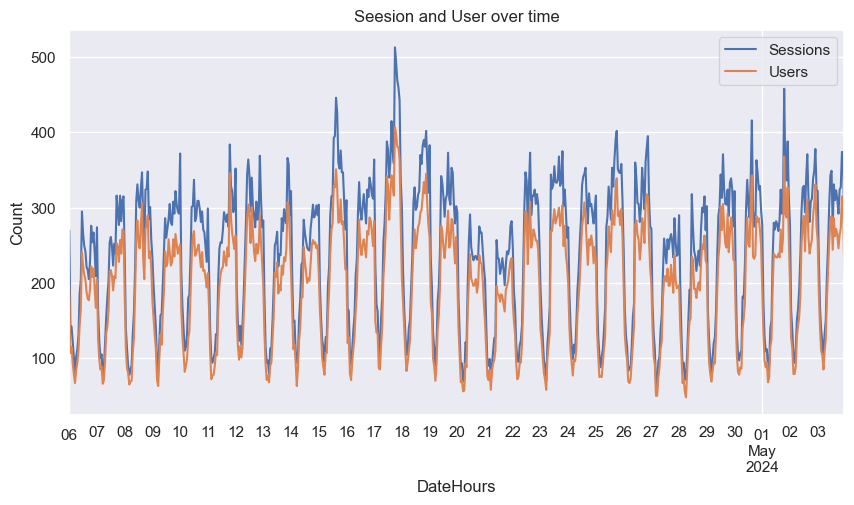

In [193]:
plt.figure(figsize=(10,5))
df.groupby('Datehour')[['Sessions','Users']].sum().plot(ax=plt.gca())
plt.title("Seesion and User over time")
plt.xlabel("DateHours")
plt.ylabel("Count")
plt.show()

# which marketing channel brought the highest number of users to the website
- total users by marketing channel

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6116\648807908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='channel group', y="Users", estimator=np.sum, palette = 'viridis')


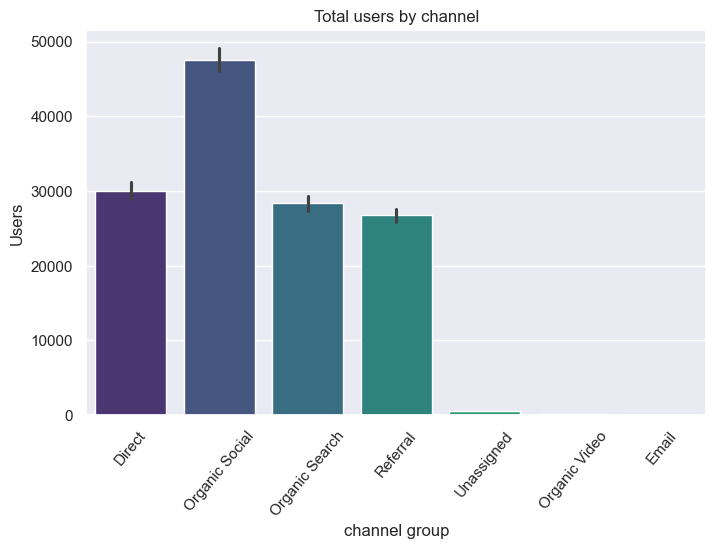

In [195]:
plt.figure(figsize= (8,5))
sns.barplot(data = df, x='channel group', y="Users", estimator=np.sum, palette = 'viridis')
plt.title("Total users by channel")
plt.xticks(rotation=50)
plt.show()

# Which channel has the highest average engagement time , and what does that tell us about user behavior and content effectiveness ?
- Average engagement time by channel

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6116\1468393230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df , x='channel group', y = 'Average engagement time per session',estimator=np.mean, palette='magma')


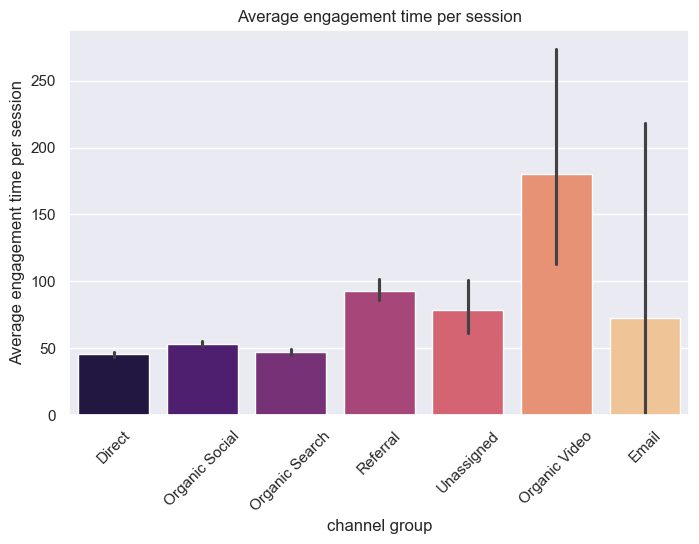

In [197]:
plt.figure(figsize = (8,5))
sns.barplot(data = df , x='channel group', y = 'Average engagement time per session',estimator=np.mean, palette='magma')
plt.title('Average engagement time per session')
plt.xticks(rotation=45)
plt.show()

# How does engagement rate vary across different traffic channels
- engagement rate distribution by channel

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6116\507583669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='channel group', y='Engagement rate',palette='coolwarm')


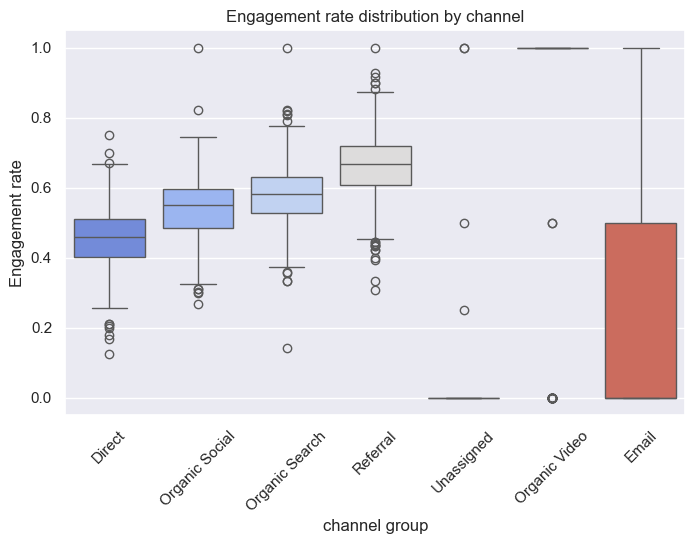

In [199]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='channel group', y='Engagement rate',palette='coolwarm')
plt.title('Engagement rate distribution by channel')
plt.xticks(rotation=45)
plt.show()

# Which channels are driving more engaged sessions compared to non-engaged ones , and what strategies can improve engagement in underperforming channels ?
- engaged vs non-engaged sessions

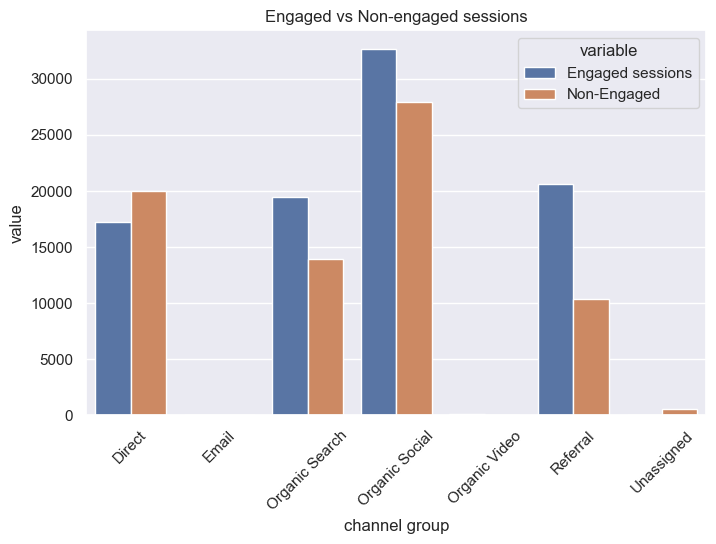

In [201]:
session_df = df.groupby('channel group')[['Sessions','Engaged sessions']].sum().reset_index()
session_df["Non-Engaged"] = session_df['Sessions'] - session_df['Engaged sessions']
session_df_melted = session_df.melt(id_vars='channel group', value_vars=['Engaged sessions', 'Non-Engaged'])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x='channel group',y = 'value', hue='variable')
plt.title("Engaged vs Non-engaged sessions")
plt.xticks(rotation=45)
plt.show()

# At what hours of the days does each channel drive the most traffic?
- traffic hour and channel

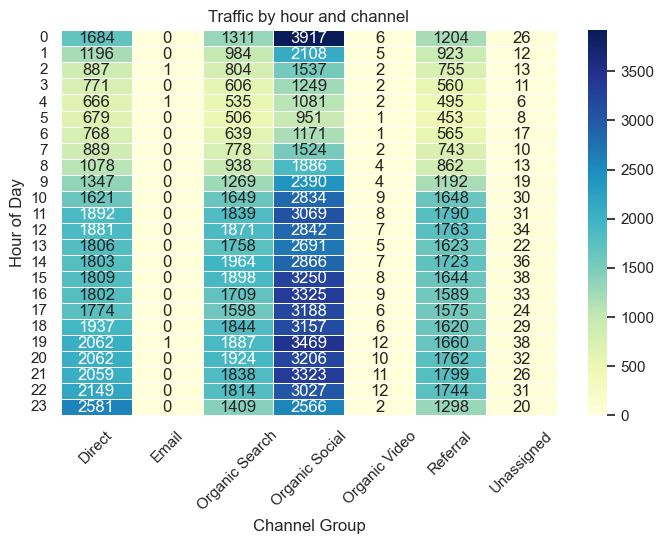

In [209]:
heatmap_data = df.groupby(['Hour', 'channel group'])['Sessions'].sum().unstack().fillna(0)

plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidth=.5, annot=True, fmt='.0f')
plt.title("Traffic by hour and channel")
plt.xlabel("Channel Group")
plt.ylabel('Hour of Day')
plt.xticks(rotation=45)
plt.show()

# Is there any correlation between high traffic (sessions) and high engagement rate over time?
- Engagement rate vs session over time

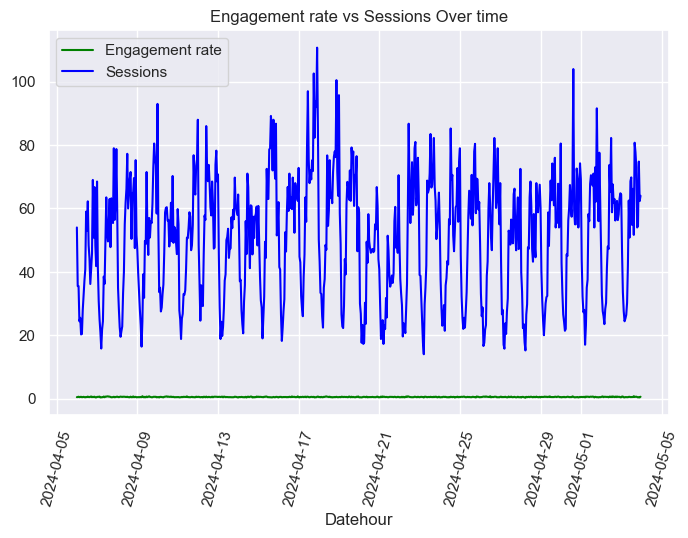

In [220]:
df_plot = df.groupby('Datehour')[['Engagement rate','Sessions']].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(df_plot['Datehour'],df_plot['Engagement rate'], label='Engagement rate', color='green')
plt.plot(df_plot['Datehour'], df_plot['Sessions'],label='Sessions',color='blue')
plt.title('Engagement rate vs Sessions Over time')
plt.xlabel('Datehour')
plt.legend()
plt.grid(True)
plt.xticks(rotation=75)
plt.show()